# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span><ul class="toc-item"><li><span><a href="#Explore-Dictionary-data" data-toc-modified-id="Explore-Dictionary-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore Dictionary data</a></span></li></ul></li><li><span><a href="#Trim--Common-Date-Span" data-toc-modified-id="Trim--Common-Date-Span-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trim  Common Date Span</a></span></li><li><span><a href="#Build-UBER-DataFrame" data-toc-modified-id="Build-UBER-DataFrame-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build UBER DataFrame</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualize the dependencies</a></span><ul class="toc-item"><li><span><a href="#Print-Column-Features" data-toc-modified-id="Print-Column-Features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Print Column Features</a></span></li></ul></li><li><span><a href="#Divide-Training-and-Prediction-data-sets" data-toc-modified-id="Divide-Training-and-Prediction-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Divide Training and Prediction data sets</a></span><ul class="toc-item"><li><span><a href="#Save-Datasets" data-toc-modified-id="Save-Datasets-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Save Datasets</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
## set up
using Dates

cutoff_date = Date("2017-01-01")

indicators_file_name = "Indicators.csv"
indicators_date_format = "yyyy-mm-dd"
indicators_file_dir = "../DATA/"

original_dir = "../DATA/original/"

include("../Julia/IndicatorData.jl") 
include("../Julia/format_rata_die_to_us_date.jl")

include("../Julia/fetch_local_CSV_as_DataFrame.jl")
include("../Julia/find_Rata_Die.jl")
include("../Julia/log_me.jl")
include("../Julia/format_dates.jl")



println()

## Fetch Data

In [2]:
## Create a Dictionary data with all Market Indicators, each indicator is a spreadsheet!

#include("../Julia/IndicatorData.jl") # addIndicator!()
data = Dict{String, IndicatorData.Indicator}()

## Read from the CSV file

using CSV, DataFrames

df = fetch_local_CSV_as_DataFrame(
    indicators_file_name, 
    indicators_date_format, 
    indicators_file_dir)

## For each row, add indicator to the Dictionary data

row_count = size(df)[1]
println( indicators_file_name, " row_count ", row_count  ) 

for row in 1:row_count
    indicator_full_name  = df[row, :Full_Name]
    url                  = df[row, :URL]
    symbol               = df[row, :Symbol] # Do NOT use "^" in names as in "^VIX"
    original_date_format = df[row, :Date_Format]
    column_to_keep       = df[row, :Column]
    oldest_date          = df[row, :Oldest]

    
    
    if oldest_date < cutoff_date # I do not want indicators that are too new
        print( " added ") 
        IndicatorData.addIndicator!(data, symbol)
    else
        print( " not added ") 
    end 
    println( row, " \t oldest " , oldest_date , " ", symbol ) 

end # for loop
df = nothing # free the memory for gc()

print()

Indicators.csv row_count 49
 added 1 	 oldest 1927-12-30 GSPC
 added 2 	 oldest 1962-01-02 TNX
 added 3 	 oldest 1971-02-05 IXIC
 added 4 	 oldest 1972-06-01 F
 added 5 	 oldest 1972-08-25 WMT
 added 6 	 oldest 1976-08-18 TM
 added 7 	 oldest 1980-12-12 AAPL
 added 8 	 oldest 1981-09-22 HD
 added 9 	 oldest 1985-01-29 DJIA
 added 10 	 oldest 1986-03-13 MSFT
 added 11 	 oldest 1987-09-10 RUT
 added 12 	 oldest 1990-01-02 VIX
 added 13 	 oldest 1990-07-31 VINIX
 added 14 	 oldest 1991-12-13 QCOM
 added 15 	 oldest 1996-05-09 BRK_B
 added 16 	 oldest 1999-01-22 NVDA
 added 17 	 oldest 2000-08-23 CRUDE_OIL
 added 18 	 oldest 2000-08-30 GOLD
 added 19 	 oldest 2001-11-12 VBTLX
 added 20 	 oldest 2003-10-01 TPLGX
 added 21 	 oldest 2004-08-19 GOOG
 added 22 	 oldest 2007-01-03 GELYF
 added 23 	 oldest 2007-02-14 US_BUZ_INV_M
 added 24 	 oldest 2007-02-14 US_RETAIL_SALES_M
 added 25 	 oldest 2007-02-15 US_INDS_PROD_M
 added 26 	 oldest 2007-02-22 US_INIT_JOB_CLAIM
 added 27 	 oldest 2007-02-2

### Explore Dictionary data

In [3]:
## Show content of the Dict{String,IndicatorData} with x entries

# data

In [4]:
# data["AAPL"].min_rata_die # 723161

In [5]:
using Statistics
describe(data["AAPL"].df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.3048e5,723161,7.3048e5,737798,,,Int64
2,Date,,1980-12-12,,2021-01-08,14638,,Date
3,Original,9.4423,0.0,0.371418,136.69,,,Float64
4,Quantized,-110.378,-128.0,-127.0,127.0,,,Float64
5,Avg005,-110.377,-128.0,-127.0,122.4,,,Float64
6,Avg010,-110.376,-128.0,-127.0,121.2,,,Float64
7,Avg030,-110.369,-128.0,-127.0,114.23,,,Float64
8,Avg060,-110.343,-128.0,-127.0,104.27,,,Float64
9,Avg090,-110.309,-128.0,-127.0,98.97,,,Float64


## Trim  Common Date Span

Example:
- for all the DataFrames
- find lowest dates
- select the highest (common) of them

In [6]:
## Trim 
include("../Julia/trim_DataFrames.jl")

trim_DataFrames!(data)

 - 1996-05-09T00:00:00 	 min_rata_die = 728788 	BRK_B
 - 2000-08-30T00:00:00 	 min_rata_die = 730362 	GOLD
 - 2007-01-03T00:00:00 	 min_rata_die = 732679 	GELYF
 - 2007-06-04T00:00:00 	 min_rata_die = 732831 	US_PEND_HOME_SALE_M
 - 2009-02-13T00:00:00 	 min_rata_die = 733451 	BYDDF
 - 2014-10-31T00:00:00 	 min_rata_die = 735537 	ARKK
 - 2007-02-22T00:00:00 	 min_rata_die = 732729 	US_INIT_JOB_CLAIM
 - 1981-09-22T00:00:00 	 min_rata_die = 723445 	HD
 - 2014-09-30T00:00:00 	 min_rata_die = 735506 	ARKW
 - 1990-01-02T00:00:00 	 min_rata_die = 726469 	VIX
 - 1990-07-31T00:00:00 	 min_rata_die = 726679 	VINIX
 - 2007-12-28T00:00:00 	 min_rata_die = 733038 	GER_UNEMPL_CHANGE
 - 2007-02-14T00:00:00 	 min_rata_die = 732721 	US_RETAIL_SALES_M
 - 2014-09-19T00:00:00 	 min_rata_die = 735495 	BABA
 - 1972-08-25T00:00:00 	 min_rata_die = 720130 	WMT
 - 1986-03-13T00:00:00 	 min_rata_die = 725078 	MSFT
 - 1927-12-30T00:00:00 	 min_rata_die = 703820 	GSPC
 - 2014-09-17T00:00:00 	 min_rata_die = 73549

## Build UBER DataFrame

In [7]:
## Print POSSIBLE fields for UBER DataFrame

for key in keys(data) 
    #df = data[key].df
    columns = names(data[key].df) # Symbols, not Strings
    for i in 1:length(columns)
        if occursin("Avg", string(columns[i]) ) # include only averages
            println(",", data[key].name, "_",columns[i], 
                " = data[\"", data[key].name, "\"].df[:,:", columns[i], "] ") 
        end # if
    end
end

,BRK_B_Avg005 = data["BRK_B"].df[:,:Avg005] 
,BRK_B_Avg010 = data["BRK_B"].df[:,:Avg010] 
,BRK_B_Avg030 = data["BRK_B"].df[:,:Avg030] 
,BRK_B_Avg060 = data["BRK_B"].df[:,:Avg060] 
,BRK_B_Avg090 = data["BRK_B"].df[:,:Avg090] 
,BRK_B_Avg120 = data["BRK_B"].df[:,:Avg120] 
,BRK_B_Avg180 = data["BRK_B"].df[:,:Avg180] 
,GOLD_Avg005 = data["GOLD"].df[:,:Avg005] 
,GOLD_Avg010 = data["GOLD"].df[:,:Avg010] 
,GOLD_Avg030 = data["GOLD"].df[:,:Avg030] 
,GOLD_Avg060 = data["GOLD"].df[:,:Avg060] 
,GOLD_Avg090 = data["GOLD"].df[:,:Avg090] 
,GOLD_Avg120 = data["GOLD"].df[:,:Avg120] 
,GOLD_Avg180 = data["GOLD"].df[:,:Avg180] 
,GELYF_Avg005 = data["GELYF"].df[:,:Avg005] 
,GELYF_Avg010 = data["GELYF"].df[:,:Avg010] 
,GELYF_Avg030 = data["GELYF"].df[:,:Avg030] 
,GELYF_Avg060 = data["GELYF"].df[:,:Avg060] 
,GELYF_Avg090 = data["GELYF"].df[:,:Avg090] 
,GELYF_Avg120 = data["GELYF"].df[:,:Avg120] 
,GELYF_Avg180 = data["GELYF"].df[:,:Avg180] 
,US_PEND_HOME_SALE_M_Avg005 = data["US_PEND_HOME_SALE_M"].df[:,:Avg00

,NVDA_Avg030 = data["NVDA"].df[:,:Avg030] 
,NVDA_Avg060 = data["NVDA"].df[:,:Avg060] 
,NVDA_Avg090 = data["NVDA"].df[:,:Avg090] 
,NVDA_Avg120 = data["NVDA"].df[:,:Avg120] 
,NVDA_Avg180 = data["NVDA"].df[:,:Avg180] 
,NRMGX_Avg005 = data["NRMGX"].df[:,:Avg005] 
,NRMGX_Avg010 = data["NRMGX"].df[:,:Avg010] 
,NRMGX_Avg030 = data["NRMGX"].df[:,:Avg030] 
,NRMGX_Avg060 = data["NRMGX"].df[:,:Avg060] 
,NRMGX_Avg090 = data["NRMGX"].df[:,:Avg090] 
,NRMGX_Avg120 = data["NRMGX"].df[:,:Avg120] 
,NRMGX_Avg180 = data["NRMGX"].df[:,:Avg180] 
,RUT_Avg005 = data["RUT"].df[:,:Avg005] 
,RUT_Avg010 = data["RUT"].df[:,:Avg010] 
,RUT_Avg030 = data["RUT"].df[:,:Avg030] 
,RUT_Avg060 = data["RUT"].df[:,:Avg060] 
,RUT_Avg090 = data["RUT"].df[:,:Avg090] 
,RUT_Avg120 = data["RUT"].df[:,:Avg120] 
,RUT_Avg180 = data["RUT"].df[:,:Avg180] 
,GER_RET_SALES_M_Avg005 = data["GER_RET_SALES_M"].df[:,:Avg005] 
,GER_RET_SALES_M_Avg010 = data["GER_RET_SALES_M"].df[:,:Avg010] 
,GER_RET_SALES_M_Avg030 = data["GER_RET_SALES_M"].df[

In [8]:
using DataFrames

## example column_name = data["SYMBOL"].df[:,:column_name] 

uber = DataFrame(  

Rata_Die = data["GSPC"].df[:,:Rata_Die] 
,Date = data["GSPC"].df[:,:Date] 
 
,BRK_B_Avg005 = data["BRK_B"].df[:,:Avg005] 
,BRK_B_Avg010 = data["BRK_B"].df[:,:Avg010] 
,BRK_B_Avg030 = data["BRK_B"].df[:,:Avg030] 
,BRK_B_Avg060 = data["BRK_B"].df[:,:Avg060] 
,BRK_B_Avg090 = data["BRK_B"].df[:,:Avg090] 
,BRK_B_Avg120 = data["BRK_B"].df[:,:Avg120] 
,BRK_B_Avg180 = data["BRK_B"].df[:,:Avg180] 
,GOLD_Avg005 = data["GOLD"].df[:,:Avg005] 
,GOLD_Avg010 = data["GOLD"].df[:,:Avg010] 
,GOLD_Avg030 = data["GOLD"].df[:,:Avg030] 
,GOLD_Avg060 = data["GOLD"].df[:,:Avg060] 
,GOLD_Avg090 = data["GOLD"].df[:,:Avg090] 
,GOLD_Avg120 = data["GOLD"].df[:,:Avg120] 
,GOLD_Avg180 = data["GOLD"].df[:,:Avg180] 
,GELYF_Avg005 = data["GELYF"].df[:,:Avg005] 
,GELYF_Avg010 = data["GELYF"].df[:,:Avg010] 
,GELYF_Avg030 = data["GELYF"].df[:,:Avg030] 
,GELYF_Avg060 = data["GELYF"].df[:,:Avg060] 
,GELYF_Avg090 = data["GELYF"].df[:,:Avg090] 
,GELYF_Avg120 = data["GELYF"].df[:,:Avg120] 
,GELYF_Avg180 = data["GELYF"].df[:,:Avg180] 
,US_PEND_HOME_SALE_M_Avg005 = data["US_PEND_HOME_SALE_M"].df[:,:Avg005] 
,US_PEND_HOME_SALE_M_Avg010 = data["US_PEND_HOME_SALE_M"].df[:,:Avg010] 
,US_PEND_HOME_SALE_M_Avg030 = data["US_PEND_HOME_SALE_M"].df[:,:Avg030] 
,US_PEND_HOME_SALE_M_Avg060 = data["US_PEND_HOME_SALE_M"].df[:,:Avg060] 
,US_PEND_HOME_SALE_M_Avg090 = data["US_PEND_HOME_SALE_M"].df[:,:Avg090] 
,US_PEND_HOME_SALE_M_Avg120 = data["US_PEND_HOME_SALE_M"].df[:,:Avg120] 
,US_PEND_HOME_SALE_M_Avg180 = data["US_PEND_HOME_SALE_M"].df[:,:Avg180] 
,BYDDF_Avg005 = data["BYDDF"].df[:,:Avg005] 
,BYDDF_Avg010 = data["BYDDF"].df[:,:Avg010] 
,BYDDF_Avg030 = data["BYDDF"].df[:,:Avg030] 
,BYDDF_Avg060 = data["BYDDF"].df[:,:Avg060] 
,BYDDF_Avg090 = data["BYDDF"].df[:,:Avg090] 
,BYDDF_Avg120 = data["BYDDF"].df[:,:Avg120] 
,BYDDF_Avg180 = data["BYDDF"].df[:,:Avg180] 
,ARKK_Avg005 = data["ARKK"].df[:,:Avg005] 
,ARKK_Avg010 = data["ARKK"].df[:,:Avg010] 
,ARKK_Avg030 = data["ARKK"].df[:,:Avg030] 
,ARKK_Avg060 = data["ARKK"].df[:,:Avg060] 
,ARKK_Avg090 = data["ARKK"].df[:,:Avg090] 
,ARKK_Avg120 = data["ARKK"].df[:,:Avg120] 
,ARKK_Avg180 = data["ARKK"].df[:,:Avg180] 
,US_INIT_JOB_CLAIM_Avg005 = data["US_INIT_JOB_CLAIM"].df[:,:Avg005] 
,US_INIT_JOB_CLAIM_Avg010 = data["US_INIT_JOB_CLAIM"].df[:,:Avg010] 
,US_INIT_JOB_CLAIM_Avg030 = data["US_INIT_JOB_CLAIM"].df[:,:Avg030] 
,US_INIT_JOB_CLAIM_Avg060 = data["US_INIT_JOB_CLAIM"].df[:,:Avg060] 
,US_INIT_JOB_CLAIM_Avg090 = data["US_INIT_JOB_CLAIM"].df[:,:Avg090] 
,US_INIT_JOB_CLAIM_Avg120 = data["US_INIT_JOB_CLAIM"].df[:,:Avg120] 
,US_INIT_JOB_CLAIM_Avg180 = data["US_INIT_JOB_CLAIM"].df[:,:Avg180] 
,HD_Avg005 = data["HD"].df[:,:Avg005] 
,HD_Avg010 = data["HD"].df[:,:Avg010] 
,HD_Avg030 = data["HD"].df[:,:Avg030] 
,HD_Avg060 = data["HD"].df[:,:Avg060] 
,HD_Avg090 = data["HD"].df[:,:Avg090] 
,HD_Avg120 = data["HD"].df[:,:Avg120] 
,HD_Avg180 = data["HD"].df[:,:Avg180] 
,ARKW_Avg005 = data["ARKW"].df[:,:Avg005] 
,ARKW_Avg010 = data["ARKW"].df[:,:Avg010] 
,ARKW_Avg030 = data["ARKW"].df[:,:Avg030] 
,ARKW_Avg060 = data["ARKW"].df[:,:Avg060] 
,ARKW_Avg090 = data["ARKW"].df[:,:Avg090] 
,ARKW_Avg120 = data["ARKW"].df[:,:Avg120] 
,ARKW_Avg180 = data["ARKW"].df[:,:Avg180] 
,VIX_Avg005 = data["VIX"].df[:,:Avg005] 
,VIX_Avg010 = data["VIX"].df[:,:Avg010] 
,VIX_Avg030 = data["VIX"].df[:,:Avg030] 
,VIX_Avg060 = data["VIX"].df[:,:Avg060] 
,VIX_Avg090 = data["VIX"].df[:,:Avg090] 
,VIX_Avg120 = data["VIX"].df[:,:Avg120] 
,VIX_Avg180 = data["VIX"].df[:,:Avg180] 
,VINIX_Avg005 = data["VINIX"].df[:,:Avg005] 
,VINIX_Avg010 = data["VINIX"].df[:,:Avg010] 
,VINIX_Avg030 = data["VINIX"].df[:,:Avg030] 
,VINIX_Avg060 = data["VINIX"].df[:,:Avg060] 
,VINIX_Avg090 = data["VINIX"].df[:,:Avg090] 
,VINIX_Avg120 = data["VINIX"].df[:,:Avg120] 
,VINIX_Avg180 = data["VINIX"].df[:,:Avg180] 
,GER_UNEMPL_CHANGE_Avg005 = data["GER_UNEMPL_CHANGE"].df[:,:Avg005] 
,GER_UNEMPL_CHANGE_Avg010 = data["GER_UNEMPL_CHANGE"].df[:,:Avg010] 
,GER_UNEMPL_CHANGE_Avg030 = data["GER_UNEMPL_CHANGE"].df[:,:Avg030] 
,GER_UNEMPL_CHANGE_Avg060 = data["GER_UNEMPL_CHANGE"].df[:,:Avg060] 
,GER_UNEMPL_CHANGE_Avg090 = data["GER_UNEMPL_CHANGE"].df[:,:Avg090] 
,GER_UNEMPL_CHANGE_Avg120 = data["GER_UNEMPL_CHANGE"].df[:,:Avg120] 
,GER_UNEMPL_CHANGE_Avg180 = data["GER_UNEMPL_CHANGE"].df[:,:Avg180] 
,US_RETAIL_SALES_M_Avg005 = data["US_RETAIL_SALES_M"].df[:,:Avg005] 
,US_RETAIL_SALES_M_Avg010 = data["US_RETAIL_SALES_M"].df[:,:Avg010] 
,US_RETAIL_SALES_M_Avg030 = data["US_RETAIL_SALES_M"].df[:,:Avg030] 
,US_RETAIL_SALES_M_Avg060 = data["US_RETAIL_SALES_M"].df[:,:Avg060] 
,US_RETAIL_SALES_M_Avg090 = data["US_RETAIL_SALES_M"].df[:,:Avg090] 
,US_RETAIL_SALES_M_Avg120 = data["US_RETAIL_SALES_M"].df[:,:Avg120] 
,US_RETAIL_SALES_M_Avg180 = data["US_RETAIL_SALES_M"].df[:,:Avg180] 
,BABA_Avg005 = data["BABA"].df[:,:Avg005] 
,BABA_Avg010 = data["BABA"].df[:,:Avg010] 
,BABA_Avg030 = data["BABA"].df[:,:Avg030] 
,BABA_Avg060 = data["BABA"].df[:,:Avg060] 
,BABA_Avg090 = data["BABA"].df[:,:Avg090] 
,BABA_Avg120 = data["BABA"].df[:,:Avg120] 
,BABA_Avg180 = data["BABA"].df[:,:Avg180] 
,WMT_Avg005 = data["WMT"].df[:,:Avg005] 
,WMT_Avg010 = data["WMT"].df[:,:Avg010] 
,WMT_Avg030 = data["WMT"].df[:,:Avg030] 
,WMT_Avg060 = data["WMT"].df[:,:Avg060] 
,WMT_Avg090 = data["WMT"].df[:,:Avg090] 
,WMT_Avg120 = data["WMT"].df[:,:Avg120] 
,WMT_Avg180 = data["WMT"].df[:,:Avg180] 
,MSFT_Avg005 = data["MSFT"].df[:,:Avg005] 
,MSFT_Avg010 = data["MSFT"].df[:,:Avg010] 
,MSFT_Avg030 = data["MSFT"].df[:,:Avg030] 
,MSFT_Avg060 = data["MSFT"].df[:,:Avg060] 
,MSFT_Avg090 = data["MSFT"].df[:,:Avg090] 
,MSFT_Avg120 = data["MSFT"].df[:,:Avg120] 
,MSFT_Avg180 = data["MSFT"].df[:,:Avg180] 
,GSPC_Avg005 = data["GSPC"].df[:,:Avg005] 
,GSPC_Avg010 = data["GSPC"].df[:,:Avg010] 
,GSPC_Avg030 = data["GSPC"].df[:,:Avg030] 
,GSPC_Avg060 = data["GSPC"].df[:,:Avg060] 
,GSPC_Avg090 = data["GSPC"].df[:,:Avg090] 
,GSPC_Avg120 = data["GSPC"].df[:,:Avg120] 
,GSPC_Avg180 = data["GSPC"].df[:,:Avg180] 
,BTC_USD_Avg005 = data["BTC_USD"].df[:,:Avg005] 
,BTC_USD_Avg010 = data["BTC_USD"].df[:,:Avg010] 
,BTC_USD_Avg030 = data["BTC_USD"].df[:,:Avg030] 
,BTC_USD_Avg060 = data["BTC_USD"].df[:,:Avg060] 
,BTC_USD_Avg090 = data["BTC_USD"].df[:,:Avg090] 
,BTC_USD_Avg120 = data["BTC_USD"].df[:,:Avg120] 
,BTC_USD_Avg180 = data["BTC_USD"].df[:,:Avg180] 
,TNX_Avg005 = data["TNX"].df[:,:Avg005] 
,TNX_Avg010 = data["TNX"].df[:,:Avg010] 
,TNX_Avg030 = data["TNX"].df[:,:Avg030] 
,TNX_Avg060 = data["TNX"].df[:,:Avg060] 
,TNX_Avg090 = data["TNX"].df[:,:Avg090] 
,TNX_Avg120 = data["TNX"].df[:,:Avg120] 
,TNX_Avg180 = data["TNX"].df[:,:Avg180] 
,US_BUILD_PERM_Avg005 = data["US_BUILD_PERM"].df[:,:Avg005] 
,US_BUILD_PERM_Avg010 = data["US_BUILD_PERM"].df[:,:Avg010] 
,US_BUILD_PERM_Avg030 = data["US_BUILD_PERM"].df[:,:Avg030] 
,US_BUILD_PERM_Avg060 = data["US_BUILD_PERM"].df[:,:Avg060] 
,US_BUILD_PERM_Avg090 = data["US_BUILD_PERM"].df[:,:Avg090] 
,US_BUILD_PERM_Avg120 = data["US_BUILD_PERM"].df[:,:Avg120] 
,US_BUILD_PERM_Avg180 = data["US_BUILD_PERM"].df[:,:Avg180] 
,US_INDS_PROD_M_Avg005 = data["US_INDS_PROD_M"].df[:,:Avg005] 
,US_INDS_PROD_M_Avg010 = data["US_INDS_PROD_M"].df[:,:Avg010] 
,US_INDS_PROD_M_Avg030 = data["US_INDS_PROD_M"].df[:,:Avg030] 
,US_INDS_PROD_M_Avg060 = data["US_INDS_PROD_M"].df[:,:Avg060] 
,US_INDS_PROD_M_Avg090 = data["US_INDS_PROD_M"].df[:,:Avg090] 
,US_INDS_PROD_M_Avg120 = data["US_INDS_PROD_M"].df[:,:Avg120] 
,US_INDS_PROD_M_Avg180 = data["US_INDS_PROD_M"].df[:,:Avg180] 
,IND_TRD_BALANCE_Avg005 = data["IND_TRD_BALANCE"].df[:,:Avg005] 
,IND_TRD_BALANCE_Avg010 = data["IND_TRD_BALANCE"].df[:,:Avg010] 
,IND_TRD_BALANCE_Avg030 = data["IND_TRD_BALANCE"].df[:,:Avg030] 
,IND_TRD_BALANCE_Avg060 = data["IND_TRD_BALANCE"].df[:,:Avg060] 
,IND_TRD_BALANCE_Avg090 = data["IND_TRD_BALANCE"].df[:,:Avg090] 
,IND_TRD_BALANCE_Avg120 = data["IND_TRD_BALANCE"].df[:,:Avg120] 
,IND_TRD_BALANCE_Avg180 = data["IND_TRD_BALANCE"].df[:,:Avg180] 
,US_HOUS_STRS_M_Avg005 = data["US_HOUS_STRS_M"].df[:,:Avg005] 
,US_HOUS_STRS_M_Avg010 = data["US_HOUS_STRS_M"].df[:,:Avg010] 
,US_HOUS_STRS_M_Avg030 = data["US_HOUS_STRS_M"].df[:,:Avg030] 
,US_HOUS_STRS_M_Avg060 = data["US_HOUS_STRS_M"].df[:,:Avg060] 
,US_HOUS_STRS_M_Avg090 = data["US_HOUS_STRS_M"].df[:,:Avg090] 
,US_HOUS_STRS_M_Avg120 = data["US_HOUS_STRS_M"].df[:,:Avg120] 
,US_HOUS_STRS_M_Avg180 = data["US_HOUS_STRS_M"].df[:,:Avg180] 
,TPLGX_Avg005 = data["TPLGX"].df[:,:Avg005] 
,TPLGX_Avg010 = data["TPLGX"].df[:,:Avg010] 
,TPLGX_Avg030 = data["TPLGX"].df[:,:Avg030] 
,TPLGX_Avg060 = data["TPLGX"].df[:,:Avg060] 
,TPLGX_Avg090 = data["TPLGX"].df[:,:Avg090] 
,TPLGX_Avg120 = data["TPLGX"].df[:,:Avg120] 
,TPLGX_Avg180 = data["TPLGX"].df[:,:Avg180] 
,CRSP_Avg005 = data["CRSP"].df[:,:Avg005] 
,CRSP_Avg010 = data["CRSP"].df[:,:Avg010] 
,CRSP_Avg030 = data["CRSP"].df[:,:Avg030] 
,CRSP_Avg060 = data["CRSP"].df[:,:Avg060] 
,CRSP_Avg090 = data["CRSP"].df[:,:Avg090] 
,CRSP_Avg120 = data["CRSP"].df[:,:Avg120] 
,CRSP_Avg180 = data["CRSP"].df[:,:Avg180] 
,FB_Avg005 = data["FB"].df[:,:Avg005] 
,FB_Avg010 = data["FB"].df[:,:Avg010] 
,FB_Avg030 = data["FB"].df[:,:Avg030] 
,FB_Avg060 = data["FB"].df[:,:Avg060] 
,FB_Avg090 = data["FB"].df[:,:Avg090] 
,FB_Avg120 = data["FB"].df[:,:Avg120] 
,FB_Avg180 = data["FB"].df[:,:Avg180] 
,AAPL_Avg005 = data["AAPL"].df[:,:Avg005] 
,AAPL_Avg010 = data["AAPL"].df[:,:Avg010] 
,AAPL_Avg030 = data["AAPL"].df[:,:Avg030] 
,AAPL_Avg060 = data["AAPL"].df[:,:Avg060] 
,AAPL_Avg090 = data["AAPL"].df[:,:Avg090] 
,AAPL_Avg120 = data["AAPL"].df[:,:Avg120] 
,AAPL_Avg180 = data["AAPL"].df[:,:Avg180] 
,F_Avg005 = data["F"].df[:,:Avg005] 
,F_Avg010 = data["F"].df[:,:Avg010] 
,F_Avg030 = data["F"].df[:,:Avg030] 
,F_Avg060 = data["F"].df[:,:Avg060] 
,F_Avg090 = data["F"].df[:,:Avg090] 
,F_Avg120 = data["F"].df[:,:Avg120] 
,F_Avg180 = data["F"].df[:,:Avg180] 
,DALLAS_FED_MFC_Avg005 = data["DALLAS_FED_MFC"].df[:,:Avg005] 
,DALLAS_FED_MFC_Avg010 = data["DALLAS_FED_MFC"].df[:,:Avg010] 
,DALLAS_FED_MFC_Avg030 = data["DALLAS_FED_MFC"].df[:,:Avg030] 
,DALLAS_FED_MFC_Avg060 = data["DALLAS_FED_MFC"].df[:,:Avg060] 
,DALLAS_FED_MFC_Avg090 = data["DALLAS_FED_MFC"].df[:,:Avg090] 
,DALLAS_FED_MFC_Avg120 = data["DALLAS_FED_MFC"].df[:,:Avg120] 
,DALLAS_FED_MFC_Avg180 = data["DALLAS_FED_MFC"].df[:,:Avg180] 
,TSLA_Avg005 = data["TSLA"].df[:,:Avg005] 
,TSLA_Avg010 = data["TSLA"].df[:,:Avg010] 
,TSLA_Avg030 = data["TSLA"].df[:,:Avg030] 
,TSLA_Avg060 = data["TSLA"].df[:,:Avg060] 
,TSLA_Avg090 = data["TSLA"].df[:,:Avg090] 
,TSLA_Avg120 = data["TSLA"].df[:,:Avg120] 
,TSLA_Avg180 = data["TSLA"].df[:,:Avg180] 
,US_ISM_MFC_EMPL_Avg005 = data["US_ISM_MFC_EMPL"].df[:,:Avg005] 
,US_ISM_MFC_EMPL_Avg010 = data["US_ISM_MFC_EMPL"].df[:,:Avg010] 
,US_ISM_MFC_EMPL_Avg030 = data["US_ISM_MFC_EMPL"].df[:,:Avg030] 
,US_ISM_MFC_EMPL_Avg060 = data["US_ISM_MFC_EMPL"].df[:,:Avg060] 
,US_ISM_MFC_EMPL_Avg090 = data["US_ISM_MFC_EMPL"].df[:,:Avg090] 
,US_ISM_MFC_EMPL_Avg120 = data["US_ISM_MFC_EMPL"].df[:,:Avg120] 
,US_ISM_MFC_EMPL_Avg180 = data["US_ISM_MFC_EMPL"].df[:,:Avg180] 
,QCOM_Avg005 = data["QCOM"].df[:,:Avg005] 
,QCOM_Avg010 = data["QCOM"].df[:,:Avg010] 
,QCOM_Avg030 = data["QCOM"].df[:,:Avg030] 
,QCOM_Avg060 = data["QCOM"].df[:,:Avg060] 
,QCOM_Avg090 = data["QCOM"].df[:,:Avg090] 
,QCOM_Avg120 = data["QCOM"].df[:,:Avg120] 
,QCOM_Avg180 = data["QCOM"].df[:,:Avg180] 
,US_GDP_Q_Avg005 = data["US_GDP_Q"].df[:,:Avg005] 
,US_GDP_Q_Avg010 = data["US_GDP_Q"].df[:,:Avg010] 
,US_GDP_Q_Avg030 = data["US_GDP_Q"].df[:,:Avg030] 
,US_GDP_Q_Avg060 = data["US_GDP_Q"].df[:,:Avg060] 
,US_GDP_Q_Avg090 = data["US_GDP_Q"].df[:,:Avg090] 
,US_GDP_Q_Avg120 = data["US_GDP_Q"].df[:,:Avg120] 
,US_GDP_Q_Avg180 = data["US_GDP_Q"].df[:,:Avg180] 
,US_ISM_MFC_PMI_Avg005 = data["US_ISM_MFC_PMI"].df[:,:Avg005] 
,US_ISM_MFC_PMI_Avg010 = data["US_ISM_MFC_PMI"].df[:,:Avg010] 
,US_ISM_MFC_PMI_Avg030 = data["US_ISM_MFC_PMI"].df[:,:Avg030] 
,US_ISM_MFC_PMI_Avg060 = data["US_ISM_MFC_PMI"].df[:,:Avg060] 
,US_ISM_MFC_PMI_Avg090 = data["US_ISM_MFC_PMI"].df[:,:Avg090] 
,US_ISM_MFC_PMI_Avg120 = data["US_ISM_MFC_PMI"].df[:,:Avg120] 
,US_ISM_MFC_PMI_Avg180 = data["US_ISM_MFC_PMI"].df[:,:Avg180] 
,CRUDE_OIL_Avg005 = data["CRUDE_OIL"].df[:,:Avg005] 
,CRUDE_OIL_Avg010 = data["CRUDE_OIL"].df[:,:Avg010] 
,CRUDE_OIL_Avg030 = data["CRUDE_OIL"].df[:,:Avg030] 
,CRUDE_OIL_Avg060 = data["CRUDE_OIL"].df[:,:Avg060] 
,CRUDE_OIL_Avg090 = data["CRUDE_OIL"].df[:,:Avg090] 
,CRUDE_OIL_Avg120 = data["CRUDE_OIL"].df[:,:Avg120] 
,CRUDE_OIL_Avg180 = data["CRUDE_OIL"].df[:,:Avg180] 
,GOOG_Avg005 = data["GOOG"].df[:,:Avg005] 
,GOOG_Avg010 = data["GOOG"].df[:,:Avg010] 
,GOOG_Avg030 = data["GOOG"].df[:,:Avg030] 
,GOOG_Avg060 = data["GOOG"].df[:,:Avg060] 
,GOOG_Avg090 = data["GOOG"].df[:,:Avg090] 
,GOOG_Avg120 = data["GOOG"].df[:,:Avg120] 
,GOOG_Avg180 = data["GOOG"].df[:,:Avg180] 
,VBTLX_Avg005 = data["VBTLX"].df[:,:Avg005] 
,VBTLX_Avg010 = data["VBTLX"].df[:,:Avg010] 
,VBTLX_Avg030 = data["VBTLX"].df[:,:Avg030] 
,VBTLX_Avg060 = data["VBTLX"].df[:,:Avg060] 
,VBTLX_Avg090 = data["VBTLX"].df[:,:Avg090] 
,VBTLX_Avg120 = data["VBTLX"].df[:,:Avg120] 
,VBTLX_Avg180 = data["VBTLX"].df[:,:Avg180] 
,DJIA_Avg005 = data["DJIA"].df[:,:Avg005] 
,DJIA_Avg010 = data["DJIA"].df[:,:Avg010] 
,DJIA_Avg030 = data["DJIA"].df[:,:Avg030] 
,DJIA_Avg060 = data["DJIA"].df[:,:Avg060] 
,DJIA_Avg090 = data["DJIA"].df[:,:Avg090] 
,DJIA_Avg120 = data["DJIA"].df[:,:Avg120] 
,DJIA_Avg180 = data["DJIA"].df[:,:Avg180] 
,US_BUZ_INV_M_Avg005 = data["US_BUZ_INV_M"].df[:,:Avg005] 
,US_BUZ_INV_M_Avg010 = data["US_BUZ_INV_M"].df[:,:Avg010] 
,US_BUZ_INV_M_Avg030 = data["US_BUZ_INV_M"].df[:,:Avg030] 
,US_BUZ_INV_M_Avg060 = data["US_BUZ_INV_M"].df[:,:Avg060] 
,US_BUZ_INV_M_Avg090 = data["US_BUZ_INV_M"].df[:,:Avg090] 
,US_BUZ_INV_M_Avg120 = data["US_BUZ_INV_M"].df[:,:Avg120] 
,US_BUZ_INV_M_Avg180 = data["US_BUZ_INV_M"].df[:,:Avg180] 
,TM_Avg005 = data["TM"].df[:,:Avg005] 
,TM_Avg010 = data["TM"].df[:,:Avg010] 
,TM_Avg030 = data["TM"].df[:,:Avg030] 
,TM_Avg060 = data["TM"].df[:,:Avg060] 
,TM_Avg090 = data["TM"].df[:,:Avg090] 
,TM_Avg120 = data["TM"].df[:,:Avg120] 
,TM_Avg180 = data["TM"].df[:,:Avg180] 
,US_UNEMPLOY_RATE_Avg005 = data["US_UNEMPLOY_RATE"].df[:,:Avg005] 
,US_UNEMPLOY_RATE_Avg010 = data["US_UNEMPLOY_RATE"].df[:,:Avg010] 
,US_UNEMPLOY_RATE_Avg030 = data["US_UNEMPLOY_RATE"].df[:,:Avg030] 
,US_UNEMPLOY_RATE_Avg060 = data["US_UNEMPLOY_RATE"].df[:,:Avg060] 
,US_UNEMPLOY_RATE_Avg090 = data["US_UNEMPLOY_RATE"].df[:,:Avg090] 
,US_UNEMPLOY_RATE_Avg120 = data["US_UNEMPLOY_RATE"].df[:,:Avg120] 
,US_UNEMPLOY_RATE_Avg180 = data["US_UNEMPLOY_RATE"].df[:,:Avg180] 
,NVDA_Avg005 = data["NVDA"].df[:,:Avg005] 
,NVDA_Avg010 = data["NVDA"].df[:,:Avg010] 
,NVDA_Avg030 = data["NVDA"].df[:,:Avg030] 
,NVDA_Avg060 = data["NVDA"].df[:,:Avg060] 
,NVDA_Avg090 = data["NVDA"].df[:,:Avg090] 
,NVDA_Avg120 = data["NVDA"].df[:,:Avg120] 
,NVDA_Avg180 = data["NVDA"].df[:,:Avg180] 
,NRMGX_Avg005 = data["NRMGX"].df[:,:Avg005] 
,NRMGX_Avg010 = data["NRMGX"].df[:,:Avg010] 
,NRMGX_Avg030 = data["NRMGX"].df[:,:Avg030] 
,NRMGX_Avg060 = data["NRMGX"].df[:,:Avg060] 
,NRMGX_Avg090 = data["NRMGX"].df[:,:Avg090] 
,NRMGX_Avg120 = data["NRMGX"].df[:,:Avg120] 
,NRMGX_Avg180 = data["NRMGX"].df[:,:Avg180] 
,RUT_Avg005 = data["RUT"].df[:,:Avg005] 
,RUT_Avg010 = data["RUT"].df[:,:Avg010] 
,RUT_Avg030 = data["RUT"].df[:,:Avg030] 
,RUT_Avg060 = data["RUT"].df[:,:Avg060] 
,RUT_Avg090 = data["RUT"].df[:,:Avg090] 
,RUT_Avg120 = data["RUT"].df[:,:Avg120] 
,RUT_Avg180 = data["RUT"].df[:,:Avg180] 
,GER_RET_SALES_M_Avg005 = data["GER_RET_SALES_M"].df[:,:Avg005] 
,GER_RET_SALES_M_Avg010 = data["GER_RET_SALES_M"].df[:,:Avg010] 
,GER_RET_SALES_M_Avg030 = data["GER_RET_SALES_M"].df[:,:Avg030] 
,GER_RET_SALES_M_Avg060 = data["GER_RET_SALES_M"].df[:,:Avg060] 
,GER_RET_SALES_M_Avg090 = data["GER_RET_SALES_M"].df[:,:Avg090] 
,GER_RET_SALES_M_Avg120 = data["GER_RET_SALES_M"].df[:,:Avg120] 
,GER_RET_SALES_M_Avg180 = data["GER_RET_SALES_M"].df[:,:Avg180] 
,RERGX_Avg005 = data["RERGX"].df[:,:Avg005] 
,RERGX_Avg010 = data["RERGX"].df[:,:Avg010] 
,RERGX_Avg030 = data["RERGX"].df[:,:Avg030] 
,RERGX_Avg060 = data["RERGX"].df[:,:Avg060] 
,RERGX_Avg090 = data["RERGX"].df[:,:Avg090] 
,RERGX_Avg120 = data["RERGX"].df[:,:Avg120] 
,RERGX_Avg180 = data["RERGX"].df[:,:Avg180] 
,IXIC_Avg005 = data["IXIC"].df[:,:Avg005] 
,IXIC_Avg010 = data["IXIC"].df[:,:Avg010] 
,IXIC_Avg030 = data["IXIC"].df[:,:Avg030] 
,IXIC_Avg060 = data["IXIC"].df[:,:Avg060] 
,IXIC_Avg090 = data["IXIC"].df[:,:Avg090] 
,IXIC_Avg120 = data["IXIC"].df[:,:Avg120] 
,IXIC_Avg180 = data["IXIC"].df[:,:Avg180]  
    
    
)

#using Statistics
#describe(uber)

,variable,mean,min,median,max,nunique
,Symbol,Union…,Any,Union…,Any,Union…
1,Rata_Die,737027.0,736256,737027.0,737798,
2,Date,,2016-10-19,,2021-01-08,1543
3,BRK_B_Avg005,81.8172,19.0,85.8,125.4,
4,BRK_B_Avg010,81.6471,19.4,85.6,124.7,
5,BRK_B_Avg030,81.0016,19.73,87.2,122.03,
6,BRK_B_Avg060,80.0544,20.5,88.22,120.65,
7,BRK_B_Avg090,79.187,22.17,87.63,117.43,
8,BRK_B_Avg120,78.3653,21.59,86.94,115.25,
9,BRK_B_Avg180,76.7267,20.38,85.74,109.28,


## Visualize the dependencies

### Print Column Features

In [14]:
## print columns in format to be taken by predict_ file.

include("../Julia/print_columns_features.jl")
include("../Julia/print_colunms.jl")

#columns = print_colunms(uber)
columns =  print_columns_features(uber)
println()



,"Rata_Die"
,"Date"
,"BRK_B_Avg005"
,"BRK_B_Avg010"
,"BRK_B_Avg030"
,"BRK_B_Avg060"
,"BRK_B_Avg090"
,"BRK_B_Avg120"
,"BRK_B_Avg180"
,"GOLD_Avg005"
,"GOLD_Avg010"
,"GOLD_Avg030"
,"GOLD_Avg060"
,"GOLD_Avg090"
,"GOLD_Avg120"
,"GOLD_Avg180"
,"GELYF_Avg005"
,"GELYF_Avg010"
,"GELYF_Avg030"
,"GELYF_Avg060"
,"GELYF_Avg090"
,"GELYF_Avg120"
,"GELYF_Avg180"
,"US_PEND_HOME_SALE_M_Avg005"
,"US_PEND_HOME_SALE_M_Avg010"
,"US_PEND_HOME_SALE_M_Avg030"
,"US_PEND_HOME_SALE_M_Avg060"
,"US_PEND_HOME_SALE_M_Avg090"
,"US_PEND_HOME_SALE_M_Avg120"
,"US_PEND_HOME_SALE_M_Avg180"
,"BYDDF_Avg005"
,"BYDDF_Avg010"
,"BYDDF_Avg030"
,"BYDDF_Avg060"
,"BYDDF_Avg090"
,"BYDDF_Avg120"
,"BYDDF_Avg180"
,"ARKK_Avg005"
,"ARKK_Avg010"
,"ARKK_Avg030"
,"ARKK_Avg060"
,"ARKK_Avg090"
,"ARKK_Avg120"
,"ARKK_Avg180"
,"US_INIT_JOB_CLAIM_Avg005"
,"US_INIT_JOB_CLAIM_Avg010"
,"US_INIT_JOB_CLAIM_Avg030"
,"US_INIT_JOB_CLAIM_Avg060"
,"US_INIT_JOB_CLAIM_Avg090"
,"US_INIT_JOB_CLAIM_Avg120"
,"US_INIT_JOB_CLAIM_Avg180"
,"HD_Avg005"
,"HD_Avg010"
,"

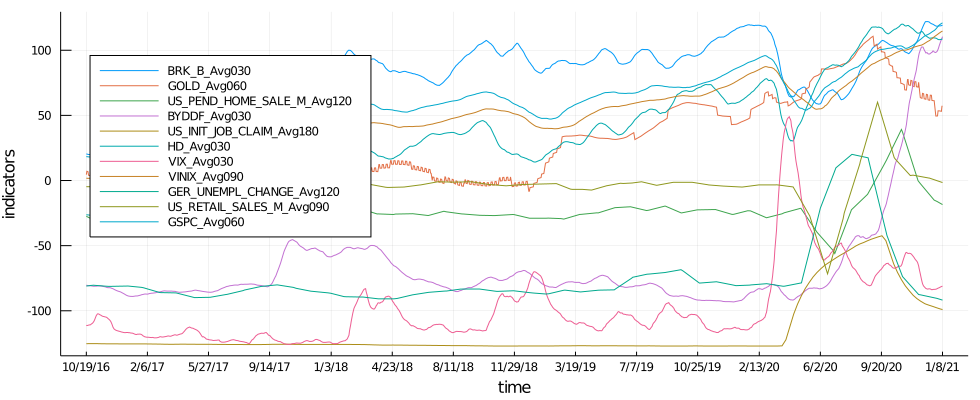

In [10]:
using Plots

record_count = size(uber)[1]
rows = 1:record_count
dates = format_dates( uber[rows,2] , "m/d/yy")

gr()
plot( dates, # x-axis: dates
   [ 
    uber[rows,5] uber[rows,13] uber[rows,29] uber[rows,33] uber[rows,51] uber[rows,54]  uber[rows,68] uber[rows,77] uber[rows,85] uber[rows,91] uber[rows,118]         
    ], # y-axis
    label = [      
      columns[5]   columns[13]   columns[29]   columns[33]   columns[51]   columns[54]    columns[68]   columns[77]   columns[85] columns[91] columns[118] "" 
    ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

In [11]:
savefig("../../indicators.png")

## Divide Training and Prediction data sets

In [12]:
record_count = size(uber)[1]
today_rata = Dates.datetime2rata( today() )
today_id = find_Rata_Die(uber, today_rata)

# I am putting overlap in the sets to see the behavior
df_training   = uber[1:today_id,:] # train up to today
df_prediction = uber[today_id-60:record_count,:] # show past predictions

println()

### Save Datasets

In [13]:
include("../Julia/save_dataset.jl")
save_dataset(df_training,   "uber_training.csv"  , "../Data/processed/");
save_dataset(df_prediction, "uber_prediction.csv", "../Data/processed/");